In [1]:
# translate file 1
import pandas as pd

file_path = "臺南市113年上半年道路交通事故原因傷亡統計.csv"
df = pd.read_csv(file_path)
print("Original Column:", df.columns.tolist())

new_column_names = {
    "總編號[案件編號]": "case_id",
    "發生日期": "date",
    "1.發生時間": "time",
    "GPS經度": "longitude",
    "GPS緯度": "latitude",
    "案件類別": "case_type",
    "地址類型": "address_type",
    "發生縣市名稱": "city",
    "3-1.24小時內死亡人數": "deaths_24h",
    "3-2.2-30日內死亡人數": "deaths_2_30d",
    "3-2.受傷人數": "injured_count",
    "4.天候": "weather",
    "5.道路照明設備[11207新增]": "road_lighting",
    "7.速限[第1當事者]": "speed_limit",
    "8.道路型態": "road_type",
    "9.事故位置": "accident_location",
    "12-1.號誌-號誌種類": "signal_type",
    "15.事故類型及型態": "accident_type",
    "34.初步分析研判子類別-主要": "preliminary_analysis"
}

df.rename(columns=new_column_names, inplace=True)
print("Changed Column:", df.columns.tolist())


output_path = "Accident Cause.csv"
df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"Saved {output_path}")


Original Column: ['總編號[案件編號]', '發生日期', '1.發生時間', 'GPS經度', 'GPS緯度', '案件類別', '地址類型', '發生縣市名稱', '3-1.24小時內死亡人數', '3-2.2-30日內死亡人數', '3-2.受傷人數', '4.天候', '5.道路照明設備[11207新增]', '7.速限[第1當事者]', '8.道路型態', '9.事故位置', '12-1.號誌-號誌種類', '15.事故類型及型態', '34.初步分析研判子類別-主要']
Changed Column: ['case_id', 'date', 'time', 'longitude', 'latitude', 'case_type', 'address_type', 'city', 'deaths_24h', 'deaths_2_30d', 'injured_count', 'weather', 'road_lighting', 'speed_limit', 'road_type', 'accident_location', 'signal_type', 'accident_type', 'preliminary_analysis']
Saved Accident Cause.csv


In [4]:
# translate file 2

file_path = "臺南市113年上半年道路交通事故當事者區分統計.csv"
df = pd.read_csv(file_path)
print("Original Column:", df.columns.tolist())

new_column_names = {
    "總編號(案件編號)": "case_id",
    " 案件類別": "case_type",
    " 國籍": "nationality",
    " 17.當事者屬(性)別": "gender",
    " 當事者事故發生時年齡": "age",
    "當事者區分(大類別)": "party_category",
    "當事者區分(類別)": "party_subcategory",
    " 牌照種類名稱": "license_type",
    "受傷程度": "injury_severity",
    "主要傷處": "main_injury",
    "保護裝備": "protective_equipment",
    "初步分析研判子類別-個別": "individual_analysis"
}

df.rename(columns=new_column_names, inplace=True)
print("Changed Column:", df.columns.tolist())

output_path = "Accident Party.csv"
df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"Saved {output_path}")


Original Column: ['總編號(案件編號)', ' 案件類別', ' 國籍', ' 17.當事者屬(性)別', ' 當事者事故發生時年齡', '當事者區分(大類別)', '當事者區分(類別)', ' 牌照種類名稱', '受傷程度', '主要傷處', '保護裝備', '初步分析研判子類別-個別']
Changed Column: ['case_id', 'case_type', 'nationality', 'gender', 'age', 'party_category', 'party_subcategory', 'license_type', 'injury_severity', 'main_injury', 'protective_equipment', 'individual_analysis']
Saved Accident Party.csv


In [5]:
# merge data
df1 = pd.read_csv("Accident Cause.csv")
df2 = pd.read_csv("Accident Party.csv")

# case_id inner join
merged_df = pd.merge(df1, df2, on="case_id", how="inner")

output_path = "Merged_Accident_Data.csv"
merged_df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"Saved {output_path}")


Saved Merged_Accident_Data.csv


In [7]:
# check dataset
def print_data_info(df, name):
    print(name)
    print(f"total rows: {df.shape[0]}")
    df_cleaned = df.dropna()
    print(f"cleaned total: {df_cleaned.shape[0]}")

df3 = pd.read_csv("Merged_Accident_Data.csv")
print_data_info(df1, "Accident Cause")
print_data_info(df2, "Accident Party")
print_data_info(df3, "Merged_Accident_Data")

Accident Cause
total rows: 22384
cleaned total: 22384
Accident Party
total rows: 50426
cleaned total: 50418
Merged_Accident_Data
total rows: 50426
cleaned total: 50418


In [21]:
file_path = "Merged_Accident_Data.csv"
df = pd.read_csv(file_path)

# 計算每個欄位的唯一值數量與內容
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].dropna().unique()

# 顯示結果
for col, values in unique_values.items():
    print(f"欄位: {col}")
    print(f"唯一值數量: {len(values)}")
    print(f"唯一值: {values[:20]}")  # 只顯示前20個，避免輸出太長
    print("-" * 50)

欄位: case_id
唯一值數量: 22384
唯一值: ['11301AC191A0005' '11301AC191A0018' '11301AC191B0041' '11301AC191B0046'
 '11301AC191B0055' '11301AC191B0100' '11301AC191B0117' '11301AC191B0141'
 '11301AC191B0147' '11301AC191B0160' '11301AC191B0162' '11301AC191B0165'
 '11301AC191B0185' '11301AC191B0187' '11301AC191B0191' '11301AC191B0196'
 '11301AC191B0218' '11301AC191B0248' '11301AC191B0273' '11301AC191B0274']
--------------------------------------------------
欄位: date
唯一值數量: 182
唯一值: [20240109 20240129 20240101 20240102 20240103 20240104 20240105 20240106
 20240107 20240108 20240110 20240111 20240112 20240113 20240114 20240115
 20240116 20240117 20240118 20240119]
--------------------------------------------------
欄位: time
唯一值數量: 9074
唯一值: [ 81830  60700 204800    500  74400 165300 193000  74600 152100  75600
  83700  85000 114600  73300 131500 141800 171400 204700 105600  80000]
--------------------------------------------------
欄位: longitude
唯一值數量: 18777
唯一值: [120.215202 120.237638 120.229201 120.217

In [22]:
unique_values = df['preliminary_analysis'].unique()

print(unique_values)

['恍神、緊張、心不在焉分心駕駛' '車輛未依規定暫停讓行人先行' '未保持行車安全距離' '未保持行車安全間隔' '闖紅燈直行'
 '無號誌路口，少線道未讓多線道先行' '左轉彎未依規定' '有號誌路口，轉彎車未讓直行車先行' '無號誌路口，左方車未讓右方車先行'
 '變換車道不當' '違反禁止迴轉或迴車標誌' '無號誌路口，支線道未讓幹線道先行'
 '相關跡證不足且無具體影像紀錄，當事人各執一詞，經分析後無法釐清肇事原因' '右轉彎未依規定' '倒車未依規定'
 '無號誌路口，轉彎車未讓直行車先行' '裝載貨物不穩妥' '橫越道路不慎' '酒醉(後)駕駛' '起步時未注意安全' '違反其他標誌(線)禁制'
 '逆向行駛' '未依規定使用燈光' '闖紅燈右轉' '其他未依規定讓車' '開啟或關閉車門不當' '車輛或機械操作不當(慎)' '迴轉未依規定'
 '未依規定行走地下道、天橋穿越道路' '闖紅燈左轉(或迴轉)' '觀看其他事故、活動、道路環境或車外資訊分心駕駛' '違規超車'
 '違反二段式左(右)轉標誌(線)' '違反閃光號誌' '其他引起事故之疏失或行為' '其他不當駕車行為'
 '未避讓(跟隨、併駛、超車)消防、救護、警備、工程救險車、毒性化學物質災害事故應變車等執行緊急任務車' '行經圓環未依規定讓車'
 '違反禁行車種標誌(字)' '違反其他號誌' '閃避不當(慎)' '尚未發現肇事因素' '方向不定(不包括危險駕車)' '未依標誌或標線穿越道路'
 '爭(搶)道行駛' '煞車失靈或故障' '違反禁止變換車道標線' '違反遵行方向標誌(線)' '動物竄出' '患病或服用藥物(疲勞)駕駛'
 '未依號誌或手勢指揮(示)穿越道路' '違規(臨時)停車' '危險駕駛' '停車操作時未注意安全' '未依規定減速'
 '多車道迴轉，未先駛入內側車道' '其他機件失靈或故障' '車輪脫落或輪胎爆裂' '打瞌睡或疲勞駕駛(包括連續駕車8小時)' '其他裝載不當'
 '超速駕駛' '穿越道路未注意左右來車' '未靠右行駛' '違反禁止左轉、右轉標誌' '肇事逃逸未查獲，無法查明肇因' '使用手持行動電話'
 '物品(件)滾(滑行)或飛(掉)落' '道路設施(備)、植栽或其他裝置，倒塌或掉(斷)落' '違反行人專用標誌(線)'
 '飲食、抽(點)菸、拿(撿)物品分心

In [50]:
# clean the rows
file_path = "Merged_Accident_Data.csv"
df = pd.read_csv(file_path)

df = df.rename(columns={
    "date": "month",             # 取發生日期的月份
    "time": "time",              # 時間 (0-24)
    "weather": "weather",        # 天候
    "speed_limit": "speed",      # 速限
    "road_type": "road_type",    # 道路型態
    "signal_type": "sign",       # 號誌類型
    "preliminary_analysis": "reason",  # 事故原因分類 (Accident Cause.csv)
    "gender": "gender",          # 性別 (Accident Party.csv)
    "age": "age",                # 當事者年齡 (Accident Party.csv)
    "party_category": "vehicle", # 車輛類型 (Accident Party.csv)
    "injury_severity": "injury"  # 事故嚴重程度 (Accident Party.csv)
})

# 轉換月份 (取出發生月份)
df["month"] = pd.to_datetime(df["month"], errors='coerce').dt.month

# 轉換天候類別
weather_map = {"晴": 1, "陰": 2, "雨": 3, '風' :4, '霧或煙':5, '風沙':4}
df["weather"] = df["weather"].replace(weather_map)

# 轉換道路型態
road_type_map = {"交叉路口": 1, "四岔路":1, "三岔路":1, "多岔路":1, "道路路段": 2, "直路":2, "彎曲路及附近":3, "地下道":3, "其他": 3, "圓環":3, "橋樑":3, '高架道路':2, '坡路':3, '廣場':3, '涵洞':3}
df["road_type"] = df["road_type"].replace(road_type_map)

# 轉換號誌類型
sign_map = {"無號誌": 1, "交通管制號誌": 2, "行車管制號誌":2, "交通管制號誌（含行人號誌）": 3, "行車管制號誌(附設行人專用號誌)": 3,"閃光號誌": 4}
df["sign"] = df["sign"].replace(sign_map)

# 轉換事故原因 (不符合的歸為 10)
reason_map = {
    '恍神、緊張、心不在焉分心駕駛': 10,
    '車輛未依規定暫停讓行人先行': 5,
    '未保持行車安全距離': 3,
    '未保持行車安全間隔': 3,
    '闖紅燈直行': 2,
    '無號誌路口，少線道未讓多線道先行': 5,
    '左轉彎未依規定': 4,
    '有號誌路口，轉彎車未讓直行車先行': 5,
    '無號誌路口，左方車未讓右方車先行': 5,
    '變換車道不當': 4,
    '違反禁止迴轉或迴車標誌': 4,
    '無號誌路口，支線道未讓幹線道先行': 5,
    '相關跡證不足且無具體影像紀錄，當事人各執一詞，經分析後無法釐清肇事原因': 10,
    '右轉彎未依規定': 4,
    '倒車未依規定': 4,
    '無號誌路口，轉彎車未讓直行車先行': 5,
    '裝載貨物不穩妥': 7,
    '橫越道路不慎': 8,
    '酒醉(後)駕駛': 10,
    '起步時未注意安全': 10,
    '違反其他標誌(線)禁制': 4,
    '逆向行駛': 10,
    '未依規定使用燈光': 10,
    '闖紅燈右轉': 2,
    '其他未依規定讓車': 5,
    '開啟或關閉車門不當': 7,
    '車輛或機械操作不當(慎)': 7,
    '迴轉未依規定': 4,
    '未依規定行走地下道、天橋穿越道路': 8,
    '闖紅燈左轉(或迴轉)': 2,
    '觀看其他事故、活動、道路環境或車外資訊分心駕駛': 10,
    '違規超車': 3,
    '違反二段式左(右)轉標誌(線)': 4,
    '違反閃光號誌': 4,
    '其他引起事故之疏失或行為': 10,
    '其他不當駕車行為': 10,
    '未避讓(跟隨、併駛、超車)消防、救護、警備、工程救險車、毒性化學物質災害事故應變車等執行緊急任務車': 5,
    '行經圓環未依規定讓車': 5,
    '違反禁行車種標誌(字)': 4,
    '違反其他號誌': 4,
    '閃避不當(慎)': 7,
    '尚未發現肇事因素': 10,
    '方向不定(不包括危險駕車)': 10,
    '未依標誌或標線穿越道路': 8,
    '爭(搶)道行駛': 3,
    '煞車失靈或故障': 7,
    '違反禁止變換車道標線': 4,
    '違反遵行方向標誌(線)': 4,
    '動物竄出': 7,
    '患病或服用藥物(疲勞)駕駛': 10,
    '未依號誌或手勢指揮(示)穿越道路': 8,
    '違規(臨時)停車': 4,
    '危險駕駛': 10,
    '停車操作時未注意安全': 8,
    '未依規定減速': 3,
    '多車道迴轉，未先駛入內側車道': 4,
    '其他機件失靈或故障': 7,
    '車輪脫落或輪胎爆裂': 7,
    '打瞌睡或疲勞駕駛(包括連續駕車8小時)': 10,
    '其他裝載不當': 7,
    '超速駕駛': 1,
    '穿越道路未注意左右來車': 8,
    '未靠右行駛': 4,
    '違反禁止左轉、右轉標誌': 4,
    '肇事逃逸未查獲，無法查明肇因': 10,
    '使用手持行動電話': 10,
    '物品(件)滾(滑行)或飛(掉)落': 7,
    '道路設施(備)、植栽或其他裝置，倒塌或掉(斷)落': 9,
    '違反行人專用標誌(線)': 4,
    '飲食、抽(點)菸、拿(撿)物品分心駕駛': 10,
    '在道路上嬉戲或奔走不定': 8,
    '違反禁止超車標誌(線)': 4,
    '操作、觀看行車輔助或娛樂性顯示設備': 10,
    '因光線、視線遮蔽致生事故': 9,
    '未遵守依法令授權交通指揮人員之指揮': 10,
    '山路會車，靠山壁車未讓外緣車先行': 5,
    '違反禁止進入標誌': 4,
    '違反車輛專用標誌(線)': 4,
    '乘客、車上動(生)物干擾分心駕駛': 10,
    '違反禁止各種車輛進入標誌': 4,
    '被車輛輾壓之不明物體彈飛': 7,
    '車輛拋錨未採安全措施': 7,
    '事故發生時當事者逕自離開現場': 10,
    '車輛附屬機具或車門未盡安全措施': 7,
    '方向操縱系統故障': 7,
    '施工安全防護措施未依規定或未盡完善(備)': 7,
    '吸食違禁物駕駛': 10,
    '裝載未盡安全措施': 7,
    '超載人員': 7,
    '車輛未停妥滑動致生事故': 7,
    '載運貨物超長、寬、高': 7
}
df["reason"] = df["reason"].apply(lambda x: reason_map.get(x, 10))

# 轉換性別
gender_map = {"男": 1, "女": 2}
df["gender"] = df["gender"].replace(gender_map)

# 轉換年齡 (限制範圍 1-115)
df["age"] = pd.to_numeric(df["age"], errors='coerce').clip(1, 115)

# 轉換車輛類型
vehicle_map = {'小客車(含客、貨兩用)': 1,'機車': 2,'公車': 3,'小貨車(含客、貨兩用)': 4,'大貨車': 5}
df['vehicle'] = df['vehicle'].replace(vehicle_map)
df['vehicle'] = df['vehicle'].fillna(6)
df['vehicle'] = df['vehicle'].apply(lambda x: 6 if isinstance(x, str) else x)

# 轉換事故嚴重程度
injury_map = {"24小時內死亡": 1,"2-30日內死亡":1, "受傷": 2, "未受傷": 3}
df["injury"] = df["injury"].replace(injury_map)

# 儲存清理後的資料
output_path = "Processed_Accident_Data.csv"
df.to_csv(output_path, index=False, encoding="utf-8-sig")
print(f"Saved cleaned data to {output_path}")


/var/folders/f9/_txtx_v56lq3bxh7r286nfqc0000gn/T/ipykernel_33303/2237026123.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["weather"] = df["weather"].replace(weather_map)
/var/folders/f9/_txtx_v56lq3bxh7r286nfqc0000gn/T/ipykernel_33303/2237026123.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sign"] = df["sign"].replace(sign_map)


Saved cleaned data to Processed_Accident_Data.csv


In [51]:
# remove null and blank
df_cleaned = df.dropna()  
df_cleaned = df_cleaned[df_cleaned.apply(lambda row: row.astype(str).str.strip().ne('')).all(axis=1)] 
df_cleaned = df_cleaned[df_cleaned['gender'].isin([1, 2])]
df_cleaned = df_cleaned[df_cleaned['injury'].isin([1, 2, 3])]

df_cleaned.head()

,case_id,month,time,longitude,latitude,case_type_x,address_type,city,deaths_24h,deaths_2_30d,...,nationality,gender,age,vehicle,party_subcategory,license_type,injury,main_injury,protective_equipment,individual_analysis
1,11301AC191A0005,1,81830,120.215202,22.992611,交通事故,其他,臺南市東區段東寧地下道,1,0,...,1,1,82.0,1,自用,汽車,1,胸部,未戴安全帽或未繫安全帶(未使用幼童安全椅),恍神、緊張、心不在焉分心駕駛
3,11301AC191A0018,1,60700,120.237638,22.970581,交通事故,一般地址,臺南市東區自由路1段3220附近,1,0,...,1,1,56.0,1,計程車,汽車,3,無,繫安全帶(使用幼童安全椅),車輛未依規定暫停讓行人先行
4,11301AC191B0041,1,204800,120.229201,22.974221,交通事故,交叉路口,臺南市東區崇善路段口崇德八街,0,0,...,1,2,61.0,2,普通重型,重機,2,多數傷,戴半罩式安全帽,尚未發現肇事因素
5,11301AC191B0041,1,204800,120.229201,22.974221,交通事故,交叉路口,臺南市東區崇善路段口崇德八街,0,0,...,1,2,29.0,2,普通重型,重機,2,多數傷,戴半罩式安全帽,恍神、緊張、心不在焉分心駕駛
7,11301AC191B0046,1,500,120.217834,22.992354,交通事故,交叉路口,臺南市東區東寧路段口勝利路,0,0,...,1,1,54.0,1,自用,汽車,3,無,繫安全帶(使用幼童安全椅),車輛未依規定暫停讓行人先行


In [52]:
columns_to_keep = ['time', 'longitude', 'latitude', 
                    'injured_count', 'weather', 'speed', 
                    'reason', 'gender', "sign","road_type",
                   'age', 'vehicle',  'injury']


df = df_cleaned[columns_to_keep]
df.head()

,time,longitude,latitude,injured_count,weather,speed,reason,gender,sign,road_type,age,vehicle,injury
1,81830,120.215202,22.992611,0,1,0,10,1,1,3,82.0,1,1
3,60700,120.237638,22.970581,0,1,30,5,1,2,1,56.0,1,3
4,204800,120.229201,22.974221,2,1,40,10,2,2,1,61.0,2,2
5,204800,120.229201,22.974221,2,1,40,10,2,2,1,29.0,2,2
7,500,120.217834,22.992354,1,1,0,5,1,2,1,54.0,1,3


In [53]:
# check again the values
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].dropna().unique()

for col, values in unique_values.items():
    print(f"欄位: {col}")
    print(f"唯一值數量: {len(values)}")
    print(f"唯一值: {values[:20]}") 
    print("-" * 50)

欄位: time
唯一值數量: 9022
唯一值: [ 81830  60700 204800    500  74400 165300 193000  74600 152100  75600
  83700  85000 114600  73300 131500 141800 171400 204700 105600  80000]
--------------------------------------------------
欄位: longitude
唯一值數量: 18657
唯一值: [120.215202 120.237638 120.229201 120.217834 120.227861 120.216005
 120.226164 120.215157 120.213611 120.231277 120.2259   120.224388
 120.228102 120.227981 120.234382 120.21823  120.221918 120.224829
 120.22755  120.212414]
--------------------------------------------------
欄位: latitude
唯一值數量: 18802
唯一值: [22.992611 22.970581 22.974221 22.992354 22.977192 22.9819   22.993631
 23.001225 22.996875 22.99405  22.993707 22.999982 22.999594 22.960627
 22.988562 22.986753 22.995088 22.975831 22.96535  22.980883]
--------------------------------------------------
欄位: injured_count
唯一值數量: 9
唯一值: [0 2 1 3 4 5 6 7 8]
--------------------------------------------------
欄位: weather
唯一值數量: 5
唯一值: [1 2 3 4 5]
---------------------------------------------

In [54]:

df.describe()

,time,longitude,latitude,injured_count,weather,speed,reason,sign,age,vehicle
count,42143.000000,42143.000000,42143.000000,42143.000000,42143.000000,42143.000000,42143.000000,42143.00000,42143.000000,42143.000000
mean,134863.202311,120.235087,23.048337,1.379565,1.136844,44.622666,5.974895,1.63835,42.201623,1.877631
std,48409.003221,0.050654,0.097348,0.628649,0.449052,12.152381,2.910933,0.83259,17.321934,0.843222
min,0.000000,120.036491,22.891140,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000
25%,93500.000000,120.200117,22.989131,1.000000,1.000000,40.000000,4.000000,1.00000,27.000000,1.000000
50%,134800.000000,120.225611,23.012178,1.000000,1.000000,50.000000,5.000000,1.00000,41.000000,2.000000
75%,173100.000000,120.260123,23.071765,2.000000,1.000000,50.000000,10.000000,2.00000,56.000000,2.000000
max,235900.000000,120.953490,24.799900,8.000000,5.000000,100.000000,10.000000,4.00000,96.000000,6.000000


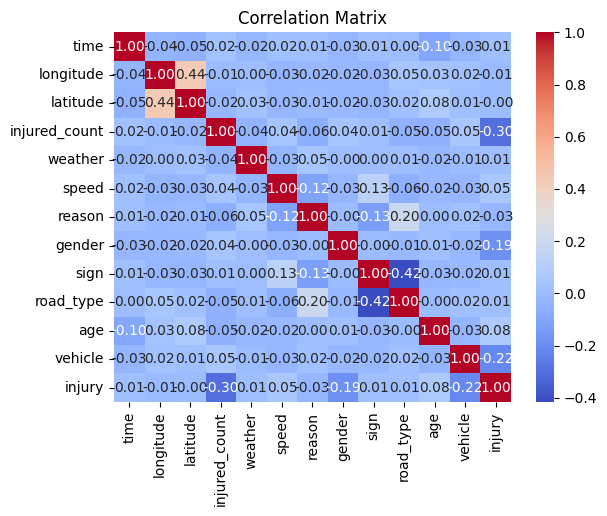

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

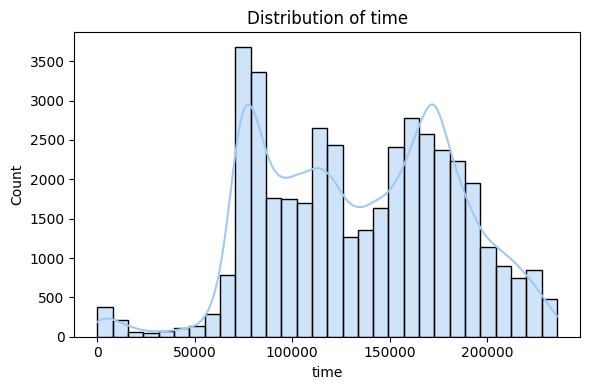

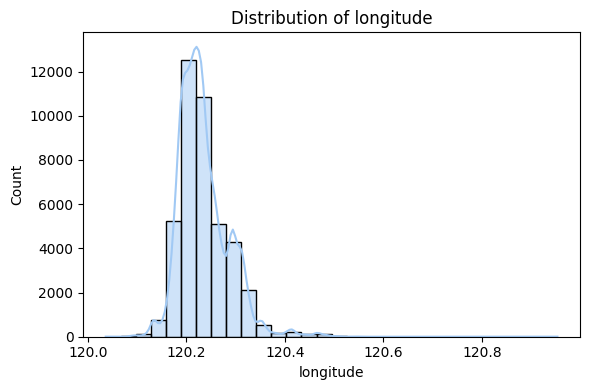

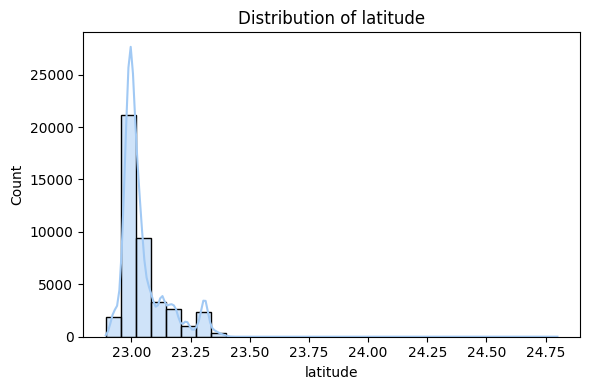

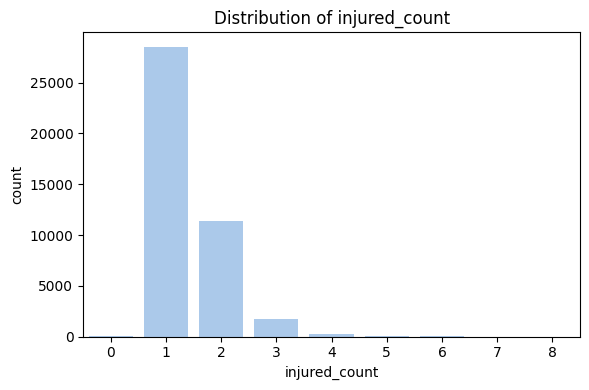

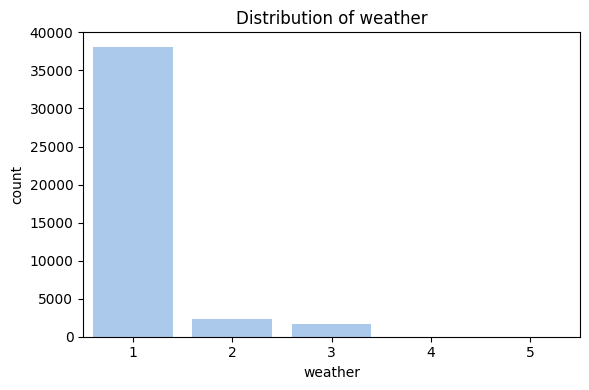

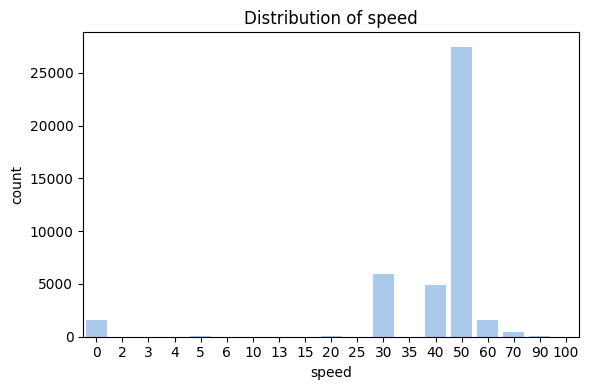

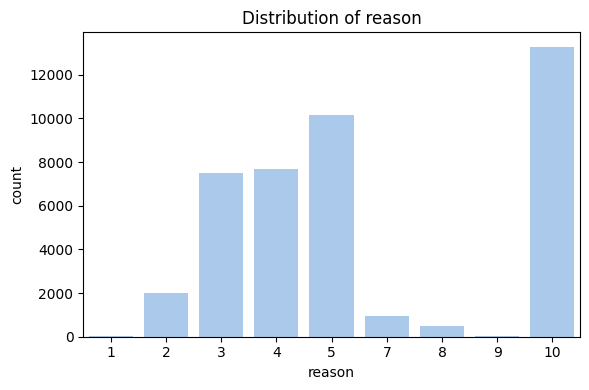

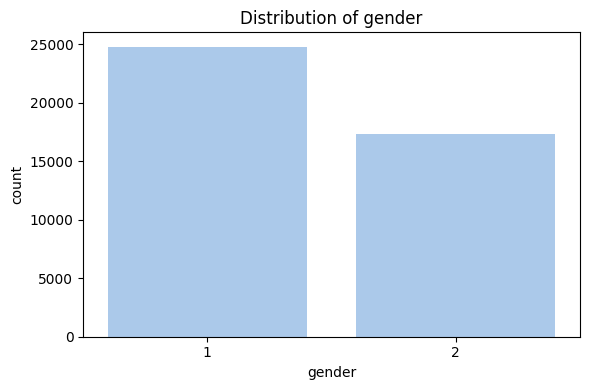

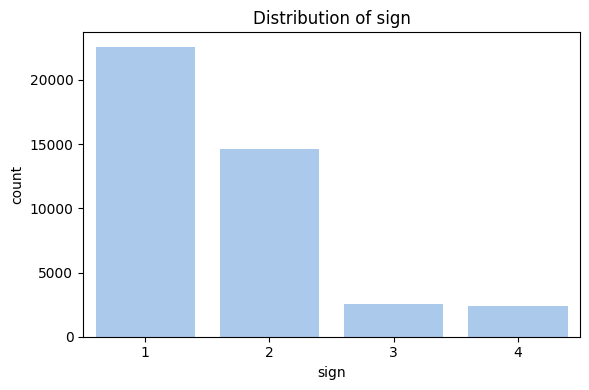

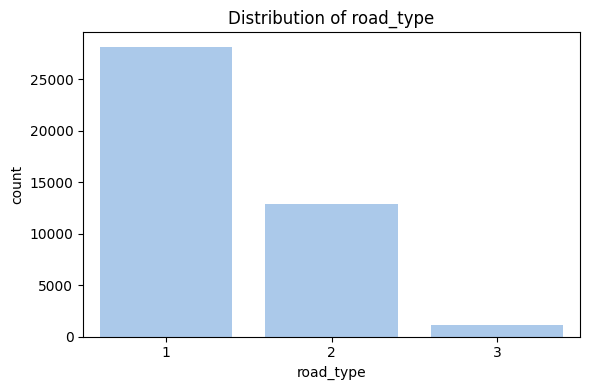

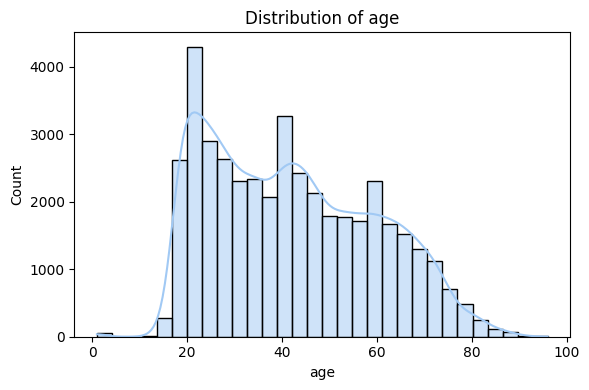

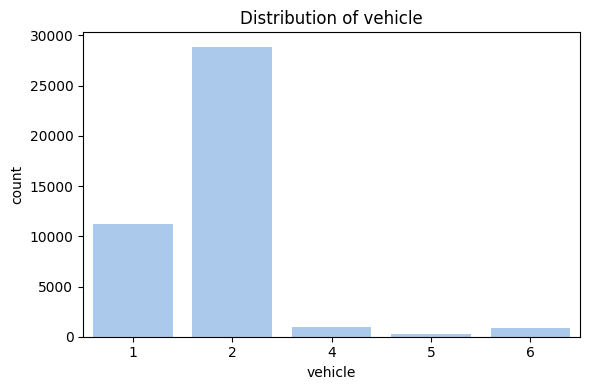

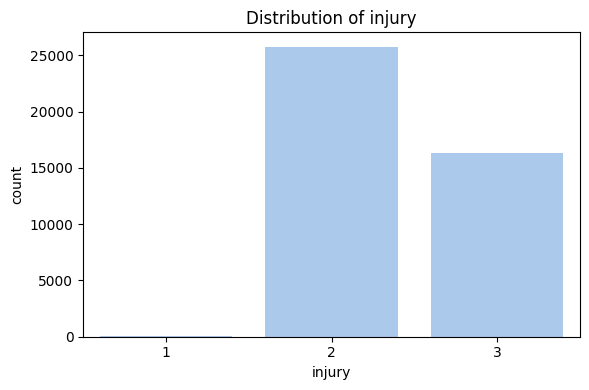

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set_palette('pastel')

# Loop through each column to plot its distribution
for col in df.columns:
    plt.figure(figsize=(6, 4))
    
    if df[col].nunique() < 20:
        # Categorical or low-cardinality numeric
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
    else:
        # Continuous variables
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()


In [58]:
# check  y variable count 1+2 = injury + death

# Binary classification task
# Predicting whether an accident results in injury or death (1), or no injury (0)

df['target'] = df['injury'].apply(lambda x: 1 if x in [1, 2] else 0)

/var/folders/f9/_txtx_v56lq3bxh7r286nfqc0000gn/T/ipykernel_33303/3903983824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['injury'].apply(lambda x: 1 if x in [1, 2] else 0)


In [68]:
# train test split
from sklearn.model_selection import train_test_split
X = df.drop(['target', 'injury', 'injured_count'], axis=1) # drop count because it is highly affecting
y = df['target'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
# do the regression first
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1441 1802]
 [ 375 4811]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.44      0.57      3243
           1       0.73      0.93      0.82      5186

    accuracy                           0.74      8429
   macro avg       0.76      0.69      0.69      8429
weighted avg       0.75      0.74      0.72      8429



             Predicted
             0      1
Actual  0  [1441   1802]  ← 沒受傷
        1  [ 375   4811]  ← 有受傷/死亡

TP (4811)：模型正確預測有受傷的個案
FP (1802)：預測錯誤，把沒受傷的人判成有受傷
FN (375)：預測錯誤，漏判有受傷的個案
TN (1441)：正確預測沒受傷

->  模型對「有受傷或死亡」的辨識能力很強（Recall = 0.93）
    模型在「沒受傷」的預測比較弱（Recall = 0.44），代表比較容易誤判沒受傷者為有受傷

In [86]:
# 補做lg gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l2'],
    'logreg__solver': ['lbfgs']  # for L2, use lbfgs or saga
}

grid = GridSearchCV(pipeline, param_grid, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
[[1436 1807]
 [ 372 4814]]
              precision    recall  f1-score   support

           0       0.79      0.44      0.57      3243
           1       0.73      0.93      0.82      5186

    accuracy                           0.74      8429
   macro avg       0.76      0.69      0.69      8429
weighted avg       0.75      0.74      0.72      8429



In [88]:
# take a look at lg + factor interaction

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('logreg', LogisticRegression(max_iter=1000))
])

poly_pipeline.fit(X_train, y_train)

y_pred_poly = poly_pipeline.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))
print("\nClassification Report:\n", classification_report(y_test, y_pred_poly))


Confusion Matrix:
 [[1925 1318]
 [ 715 4471]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.65      3243
           1       0.77      0.86      0.81      5186

    accuracy                           0.76      8429
   macro avg       0.75      0.73      0.73      8429
weighted avg       0.76      0.76      0.75      8429



In [89]:
# check what factors interactions are more important
import pandas as pd
import numpy as np

poly = poly_pipeline.named_steps['poly']
logreg = poly_pipeline.named_steps['logreg']

feature_names = poly.get_feature_names_out(X.columns)
coefficients = logreg.coef_[0]

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coef': np.abs(coefficients)
})

top_features = coef_df.sort_values(by='abs_coef', ascending=False).head(20)
print(top_features[['feature', 'coefficient']])


               feature  coefficient
10             vehicle     1.332309
59      gender vehicle     1.206995
6               gender     0.597737
20        time vehicle     0.157623
9                  age    -0.115518
58          gender age     0.107098
64   road_type vehicle    -0.073018
8            road_type    -0.067033
46        speed gender     0.056197
53    reason road_type     0.051305
19            time age    -0.047754
37    latitude vehicle    -0.046169
45        speed reason    -0.045439
2             latitude     0.044985
35  latitude road_type     0.043854
5               reason     0.042966
28       longitude age    -0.040182
4                speed    -0.038287
65         age vehicle    -0.037284
29   longitude vehicle    -0.033641


In [72]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC(kernel='rbf', C=1.0, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Confusion Matrix:
[[2070 1173]
 [3230 1956]]

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.64      0.48      3243
           1       0.63      0.38      0.47      5186

    accuracy                           0.48      8429
   macro avg       0.51      0.51      0.48      8429
weighted avg       0.53      0.48      0.48      8429



In [73]:
# SVM add GridSearchCV
# I got really mad here because it spent more than 140 mins still not done.
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'linear'],
    'class_weight': ['balanced']
}

svc = SVC(random_state=42)
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time= 2.5min
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time= 2.5min
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time= 2.5min
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time= 2.5min
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time= 2.6min
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time= 2.0min
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time= 2.0min
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time= 2.0min
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time= 1.9min
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time= 1.9min
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=linear; total time=34.0min
[CV] END C=0.1, class_weight

KeyboardInterrupt: 

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

# try only 20% data, because it took too long to run all
X_small, _, y_small, _ = train_test_split(X, y, test_size=0.8, random_state=42, stratify=y)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['auto'],
    'svc__kernel': ['linear']
}

grid = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

best_svm = grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ....svc__C=0.1, svc__gamma=auto, svc__kernel=linear; total time=  30.3s
[CV] END ....svc__C=0.1, svc__gamma=auto, svc__kernel=linear; total time=  31.0s
[CV] END ....svc__C=0.1, svc__gamma=auto, svc__kernel=linear; total time=  31.4s
[CV] END ......svc__C=1, svc__gamma=auto, svc__kernel=linear; total time=  37.8s
[CV] END ......svc__C=1, svc__gamma=auto, svc__kernel=linear; total time=  38.3s
[CV] END ......svc__C=1, svc__gamma=auto, svc__kernel=linear; total time=  40.0s
[CV] END .....svc__C=10, svc__gamma=auto, svc__kernel=linear; total time= 2.7min
[CV] END .....svc__C=10, svc__gamma=auto, svc__kernel=linear; total time= 4.4min


KeyboardInterrupt: 

In [77]:
# still too long, decide to use what I got
# Best Parameters: {'svc__C': 1, 'svc__gamma': 'auto', 'svc__kernel': 'linear'}
best_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(C=1, gamma='auto', kernel='linear'))
])

best_svm.fit(X_train, y_train)
y_pred_svm = best_svm.predict(X_test)

print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



[[2044 1199]
 [ 198 4988]]
              precision    recall  f1-score   support

           0       0.91      0.63      0.75      3243
           1       0.81      0.96      0.88      5186

    accuracy                           0.83      8429
   macro avg       0.86      0.80      0.81      8429
weighted avg       0.85      0.83      0.83      8429



In [78]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix:
[[2385  858]
 [ 325 4861]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      3243
           1       0.85      0.94      0.89      5186

    accuracy                           0.86      8429
   macro avg       0.87      0.84      0.85      8429
weighted avg       0.86      0.86      0.86      8429



In [79]:
# random forset GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Best parameters:", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
y_pred_best = best_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
[[2367  876]
 [ 227 4959]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      3243
           1       0.85      0.96      0.90      5186

    accuracy                           0.87      8429
   macro avg       0.88      0.84      0.86      8429
weighted avg       0.87      0.87      0.87      8429



In [80]:
# logistic predict example
import pandas as pd

# 從 test set 隨機取 3 筆
sample_idx = X_test.sample(3, random_state=42).index
X_sample = X_test.loc[sample_idx]
y_true_sample = y_test.loc[sample_idx]
y_pred_sample = model.predict(X_sample)

for i in range(len(X_sample)):
    print(f"Prediction Example {i+1}")
    print(X_sample.iloc[i]) 
    print(f"Actual outcome: {'Injured' if y_true_sample.iloc[i] == 1 else 'Not Injured'}")
    print(f"Predicted: {'Injured' if y_pred_sample[i] == 1 else 'Not Injured'}")
    print("-" * 50)


Prediction Example 1
time             183200
longitude    120.167696
latitude      23.164977
weather               1
speed                30
reason                5
gender                2
sign                  3
road_type             1
age                45.0
vehicle               2
Name: 4654, dtype: object
Actual outcome: Injured
Predicted: Injured
--------------------------------------------------
Prediction Example 2
time            213000
longitude    120.24995
latitude     23.021212
weather              1
speed               50
reason              10
gender               1
sign                 1
road_type            2
age               20.0
vehicle              2
Name: 48119, dtype: object
Actual outcome: Injured
Predicted: Injured
--------------------------------------------------
Prediction Example 3
time              90300
longitude    120.203453
latitude      23.002706
weather               1
speed                50
reason                3
gender                1
sign       

In [82]:
# logistic predict example 2 

synth_data = pd.DataFrame([
    {  # High-risk scenario
        'time': 230500,               # 深夜時段
        'longitude': 121.543990,      # 隨機台灣座標
        'latitude': 25.033964,
        'weather': 3,                 # 雨天
        'speed': 95,                  # 高速
        'reason': 2,                  # 超速
        'gender': 1,                  # 男性
        'sign': 2,                    # 闖紅燈
        'road_type': 2,               # 快速道路
        'age': 22,
        'vehicle': 1                  # 機車
    },
    {  # Low-risk scenario
        'time': 103000,               # 白天上班時間
        'longitude': 120.300000,
        'latitude': 23.000000,
        'weather': 1,                 # 晴天
        'speed': 35,                  # 低速
        'reason': 10,                 # other
        'gender': 2,                  # 女性
        'sign': 0,                    # 無違規
        'road_type': 1,               # 一般道路
        'age': 40,
        'vehicle': 2                  # 汽車
    }
])

synth_preds = model.predict(synth_data)

for i in range(len(synth_data)):
    print(f"Synthesized Example {i+1}")
    print(synth_data.iloc[i])
    print(f"Model prediction: {'Injured' if synth_preds[i] == 1 else 'Not Injured'}")
    print("-" * 50)


Synthesized Example 1
time         230500.000000
longitude       121.543990
latitude         25.033964
weather           3.000000
speed            95.000000
reason            2.000000
gender            1.000000
sign              2.000000
road_type         2.000000
age              22.000000
vehicle           1.000000
Name: 0, dtype: float64
Model prediction: Not Injured
--------------------------------------------------
Synthesized Example 2
time         103000.0
longitude       120.3
latitude         23.0
weather           1.0
speed            35.0
reason           10.0
gender            2.0
sign              0.0
road_type         1.0
age              40.0
vehicle           2.0
Name: 1, dtype: float64
Model prediction: Injured
--------------------------------------------------


In [83]:
# together
svm_preds = best_svm.predict(synth_data)
rf_preds = best_rf.predict(synth_data)


for i in range(len(synth_data)):
    print(f"Synthesized Example {i+1}")
    print(synth_data.iloc[i])
    print(f"SVM prediction: {'Injured' if svm_preds[i] == 1 else 'Not Injured'}")
    print(f"Random Forest prediction: {'Injured' if rf_preds[i] == 1 else 'Not Injured'}")
    print("-" * 50)


Synthesized Example 1
time         230500.000000
longitude       121.543990
latitude         25.033964
weather           3.000000
speed            95.000000
reason            2.000000
gender            1.000000
sign              2.000000
road_type         2.000000
age              22.000000
vehicle           1.000000
Name: 0, dtype: float64
SVM prediction: Not Injured
Random Forest prediction: Not Injured
--------------------------------------------------
Synthesized Example 2
time         103000.0
longitude       120.3
latitude         23.0
weather           1.0
speed            35.0
reason           10.0
gender            2.0
sign              0.0
road_type         1.0
age              40.0
vehicle           2.0
Name: 1, dtype: float64
SVM prediction: Injured
Random Forest prediction: Injured
--------------------------------------------------


In [85]:
import numpy as np
random_indices = np.random.choice(X_test.index, 3, replace=False)
sample_X = X_test.loc[random_indices]
sample_y = y_test.loc[random_indices]

svm_preds = best_svm.predict(sample_X)
rf_preds = best_rf.predict(sample_X)

for i, idx in enumerate(random_indices):
    print(f"Random Example {i+1}")
    print(X_test.loc[idx])
    print(f"Actual outcome: {'Injured' if y_test.loc[idx]==1 else 'Not Injured'}")
    print(f"SVM prediction: {'Injured' if svm_preds[i]==1 else 'Not Injured'}")
    print(f"Random Forest prediction: {'Injured' if rf_preds[i]==1 else 'Not Injured'}")
    print("-" * 60)


Random Example 1
time             164600
longitude    120.244155
latitude      23.041698
weather               1
speed                50
reason                4
gender                1
sign                  2
road_type             1
age                22.0
vehicle               2
Name: 40517, dtype: object
Actual outcome: Injured
SVM prediction: Injured
Random Forest prediction: Injured
------------------------------------------------------------
Random Example 2
time            123705
longitude     120.2029
latitude     22.999639
weather              1
speed               30
reason              10
gender               2
sign                 1
road_type            1
age               46.0
vehicle              1
Name: 20686, dtype: object
Actual outcome: Not Injured
SVM prediction: Not Injured
Random Forest prediction: Not Injured
------------------------------------------------------------
Random Example 3
time              91000
longitude    120.260153
latitude      23.030609
weather 

In [87]:
# check over/underfitting
from sklearn.metrics import accuracy_score

print("Logistic Regression:")
print("Train:", accuracy_score(y_train, grid.predict(X_train)))
print("Test:", accuracy_score(y_test, grid.predict(X_test)))

print("\nSVM:")
print("Train:", accuracy_score(y_train, best_svm.predict(X_train)))
print("Test:", accuracy_score(y_test, best_svm.predict(X_test)))

print("\nRandom Forest:")
print("Train:", accuracy_score(y_train, best_rf.predict(X_train)))
print("Test:", accuracy_score(y_test, best_rf.predict(X_test)))


Logistic Regression:
Train: 0.743607996677938
Test: 0.7414877209633408

SVM:
Train: 0.8317612861125941
Test: 0.8342626646102741

Random Forest:
Train: 0.8688378715073857
Test: 0.8691422470043896
